# **Week 1**

- Coding and visualizing simple quantum circuits  
- Measuring and Quantifying Probabilities vs. Shot Count
- Generating Arbitrary Probabilities
- Generating and Measuring Bell States

**Coding and visualizing simple quantum circuits**

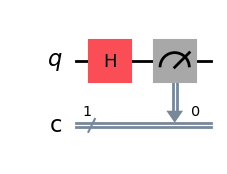

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
 
# Create a new circuit with one
qc = QuantumCircuit(1,1)
 
# Add a Hadamard gate to qubit 0
qc.h(0)

qc.measure(range(1), range(1))
qc.draw("mpl")

Quantum Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


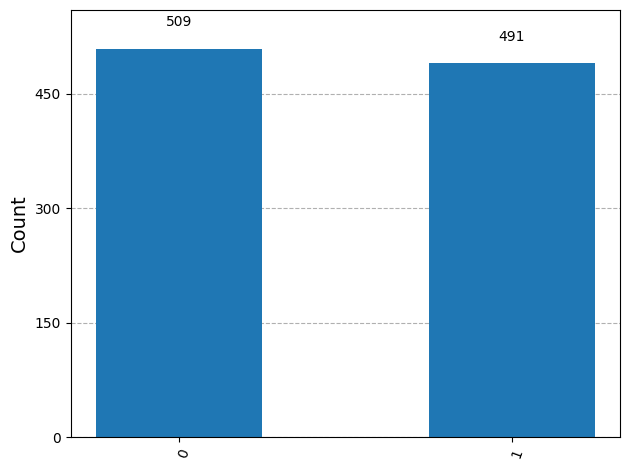

In [2]:
print("Quantum Circuit:")
print(qc.draw(output='text'))

# Simulate using Aer
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

# Get counts
counts = result.get_counts()

plot_histogram(counts)

**Measuring and Quantifying Probabilities vs. Shot Count**

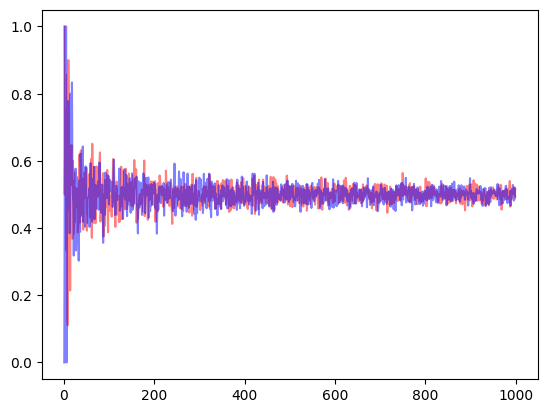

In [3]:
#Probability and Shot Count for 1/sqrt{2} (|0> + |1>) state
sc = QuantumCircuit(1,1)
sc.h(0)
sc.measure(0,0)

#Probability and Shot Count for 1/sqrt{2} (|0> + i|1>) state
sc2 = QuantumCircuit(1,1)
sc2.h(0)
sc2.s(0)
sc2.measure(0,0)

#simulator setup
simulator = Aer.get_backend('aer_simulator')
simulator2 = Aer.get_backend('aer_simulator')

#measurements
total_plot1 = []
total_plot2 = []
for i in range(1,1000):
    compiled_circuit = transpile(sc, simulator)
    job = simulator.run(compiled_circuit, shots=i)
    result = job.result()
    counts = result.get_counts()

    compiled_circuit2 = transpile(sc2, simulator)
    job2 = simulator.run(compiled_circuit2, shots=i)
    result2 = job2.result()
    counts2 = result2.get_counts()
    # print(counts)
    try:
        total_plot1.append(counts['0']/i)
    except:
        total_plot1.append(1-counts['1']/i)
    try:
        total_plot2.append(counts2['0']/i)
    except:
        total_plot2.append(1-counts2['1']/i)

def smoothen(list):
    radius = 5
    smoothened = [0]*len(list)
    averages = []
    for i in range(len(list)):
        for j in range(-1*radius, radius + 1):
            if (i + j > -1 and i + j < len(list)):
                averages.append(list[i+j])
        smoothened[i] = (sum(averages))/(len(averages))
        averages = []
    return smoothened

# smooth_plot = smoothen(total_plot1)

plt.plot(range(1,1000), total_plot1, color='red', alpha=0.5)
plt.plot(range(1,1000), total_plot2, color='blue', alpha=0.5)
plt.show()
    

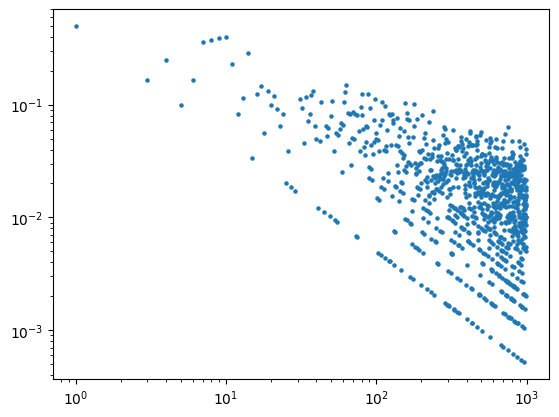

In [4]:
# Relative Error Plot

for i in range(len(total_plot1)):
    total_plot1[i] = abs(total_plot1[i] - 0.5)

plt.scatter(range(1,1000), total_plot1, s = 5)
plt.yscale('log')
plt.xscale('log')
plt.show()


**Generating Arbitrary Probabilities**

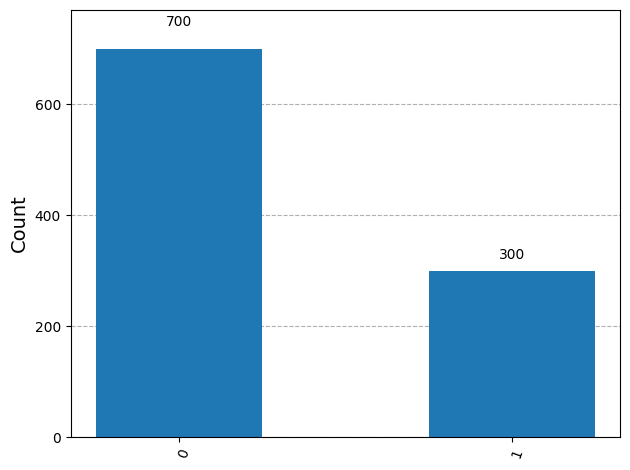

In [43]:
import numpy as np

p = 0.70 # Probability of measuring |0>
theta = 2 * np.arccos(np.sqrt(p))

ap = QuantumCircuit(1)
ap.rx(theta, 0)
ap.measure_all()
ap.draw("mpl")

# Simulate the circuit
compiled_ap = transpile(ap, simulator)
job_ap = simulator.run(compiled_ap, shots=1000)
result_ap = job_ap.result()

# Graph Counts
counts_ap = result_ap.get_counts()
plot_histogram(counts_ap)

**Generating and Measuring Bell States**

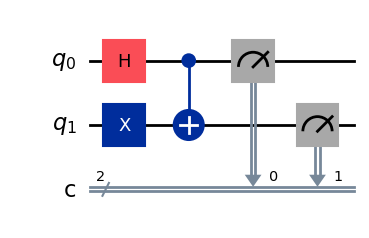

In [ ]:
# Simple Bell State Circuit that generates the state 1/sqert{2} (|01> + |10>)
simple_bell = QuantumCircuit(2, 2)
simple_bell.h(0)
simple_bell.x(1)
simple_bell.cx(0, 1)
simple_bell.measure([0, 1], [0, 1])
simple_bell.draw("mpl")

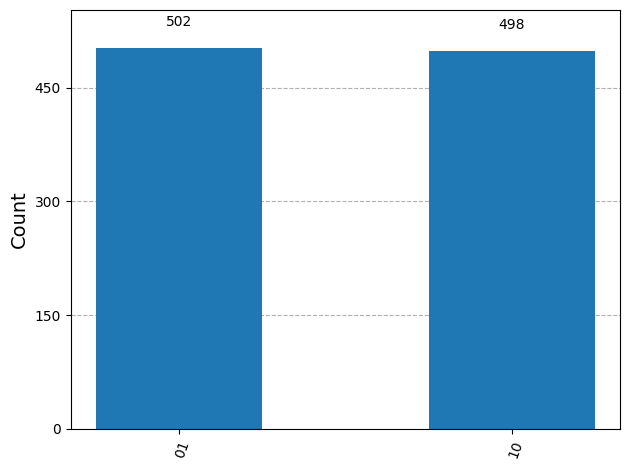

In [ ]:
# Plotting above entangled state
compiled_simple_bell = transpile(simple_bell, simulator)
job_simple_bell = simulator.run(compiled_simple_bell, shots=1000)
result_simple_bell = job_simple_bell.result()
counts_simple_bell = result_simple_bell.get_counts()

plot_histogram(counts_simple_bell)

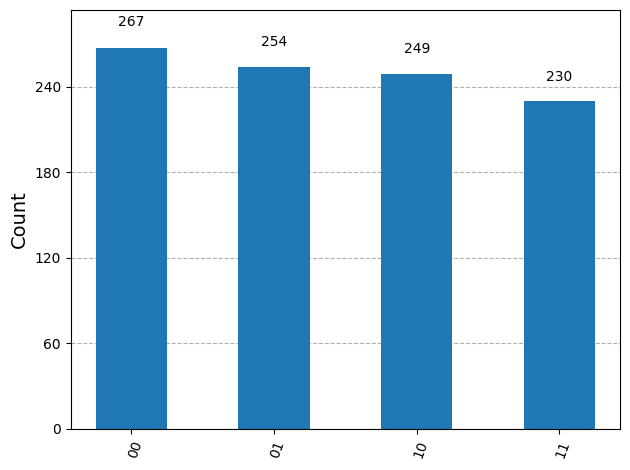

In [75]:
# Bell state circuit that generates |+>|+> state
bell_plus = QuantumCircuit(2, 2)
bell_plus.h(0)
bell_plus.h(1)
bell_plus.x(1)
bell_plus.cx(0, 1)
bell_plus.measure([0, 1], [0, 1])
bell_plus.draw("mpl")

# Plotting above entangled state
compiled_bell_plus = transpile(bell_plus, simulator)
job_bell_plus = simulator.run(compiled_bell_plus, shots=1000)
result_bell_plus = job_bell_plus.result()
counts_bell_plus = result_bell_plus.get_counts()
plot_histogram(counts_bell_plus)